In [1]:
mischka_rcs = []
mischka_ucsc = {}
mischka_ucsc_w_gene = []
f = open("mischka.all_retrocopies_wUn.sorted.txt", 'rt')
for line in f:
    line = line.rstrip().split()
    mischka_rcs.append(line[0:4])
    if "/" not in line[3]:
        mischka_ucsc["{}:{}-{}".format(line[0], line[1], line[2])] = "{}_{}:{}-{}".format(line[3], line[0], line[1], line[2])
    else:
        mischka_ucsc["{}:{}-{}".format(line[0], line[1], line[2])] = "{}_{}:{}-{}".format("+".join(line[3].split("/")), line[0], line[1], line[2])
f.close()
mischka_rcs

[['chr1', '325443', '330783', 'ZFR'],
 ['chr1', '408403', '409542', 'SNX3'],
 ['chr1', '737234', '737714', 'RPS17'],
 ['chr1', '5129446', '5129882', 'RPL34'],
 ['chr1', '5321743', '5324308', 'MAPRE1'],
 ['chr1', '5723596', '5724821', 'USP49'],
 ['chr1', '6681571', '6682924', 'NPM1'],
 ['chr1', '6863076', '6864098', 'MTCH2'],
 ['chr1', '6892121', '6892855', 'TEX35'],
 ['chr1', '7316394', '7317488', 'GAPDH'],
 ['chr1', '8098375', '8098750', 'RPL31'],
 ['chr1', '9335741', '9337412', 'HNRNPC'],
 ['chr1', '10073974', '10074431', 'NME1'],
 ['chr1', '12966881', '12967310', 'RPL31'],
 ['chr1', '13071355', '13071537', 'NTPCR'],
 ['chr1', '14211120', '14211771', 'BTF3'],
 ['chr1', '14743647', '14744381', 'PPIA'],
 ['chr1', '14868551', '14869191', 'RPL29'],
 ['chr1', '16250498', '16251091', 'RPL17'],
 ['chr1', '16393477', '16394886', 'ST13'],
 ['chr1', '19233451', '19234324', 'H3-3A'],
 ['chr1', '21241008', '21241633', 'TMSB4X'],
 ['chr1', '21578036', '21578804', 'TIMM9'],
 ['chr1', '22415593', '

In [2]:
mischka_ucsc

{'chr1:325443-330783': 'ZFR_chr1:325443-330783',
 'chr1:408403-409542': 'SNX3_chr1:408403-409542',
 'chr1:737234-737714': 'RPS17_chr1:737234-737714',
 'chr1:5129446-5129882': 'RPL34_chr1:5129446-5129882',
 'chr1:5321743-5324308': 'MAPRE1_chr1:5321743-5324308',
 'chr1:5723596-5724821': 'USP49_chr1:5723596-5724821',
 'chr1:6681571-6682924': 'NPM1_chr1:6681571-6682924',
 'chr1:6863076-6864098': 'MTCH2_chr1:6863076-6864098',
 'chr1:6892121-6892855': 'TEX35_chr1:6892121-6892855',
 'chr1:7316394-7317488': 'GAPDH_chr1:7316394-7317488',
 'chr1:8098375-8098750': 'RPL31_chr1:8098375-8098750',
 'chr1:9335741-9337412': 'HNRNPC_chr1:9335741-9337412',
 'chr1:10073974-10074431': 'NME1_chr1:10073974-10074431',
 'chr1:12966881-12967310': 'RPL31_chr1:12966881-12967310',
 'chr1:13071355-13071537': 'NTPCR_chr1:13071355-13071537',
 'chr1:14211120-14211771': 'BTF3_chr1:14211120-14211771',
 'chr1:14743647-14744381': 'PPIA_chr1:14743647-14744381',
 'chr1:14868551-14869191': 'RPL29_chr1:14868551-14869191',
 'c

In [3]:
f = open("mischka.extract_seqs.cmds", 'w')
for entry in list(mischka_ucsc.keys()):
    chro = entry.split(":")[0]
    start = entry.split(":")[1].split("-")[0]
    end = entry.split("-")[1]
    filename = "{}_{}_{}".format(chro, start, end)
    f.write("samtools faidx /nfs/turbo/jmkidddata/genomes/UU_Cfam_GSD_1.0/ref/UU_Cfam_GSD_1.0.fa {} -o mischka_rc_seqs/rc_seqs_for_blatting/{}_seq.fa\n".format(entry, filename))
f.close()    
    
    
    

In [4]:
f = open("mischka.blat_rcs_against_cdna.cmds", 'w')
for rc, gene_rc in mischka_ucsc.items():
    gene = gene_rc.split("_")[0]
    if "/" in gene:
        print(gene)
    chro = rc.split(":")[0]
    start = rc.split(":")[1].split("-")[0]
    end = rc.split("-")[1]
    seq_filename = "{}_{}_{}".format(chro, start, end)
    blat_filename = "{}_{}_{}_{}".format(gene, chro, start, end)
    f.write("blat /nfs/turbo/jmkiddscr/anthony-projects/retrocopy_analysis/mischka_cDNA/mischka_all_cDNA.fa mischka_rc_seqs/rc_seqs_for_blatting/{}_seq.fa mischka_rc_seqs/rcs_blat_against_cDNA/{}_blat_results.psl\n".format(seq_filename, blat_filename))
f.close()    
    
    
    

In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

In [6]:
mismatch_retrocopies = {} 
mismatch_no_gene = {}
for rc, gene_rc in mischka_ucsc.items():
    parent = gene_rc.split("_")[0]
    chro = rc.split(":")[0]
    start = rc.split(":")[1].split("-")[0]
    end = rc.split("-")[1]
    blat_filename = "{}_{}_{}_{}".format(parent, chro, start, end)
    parent_list = False
    f = open("mischka_rc_seqs/rcs_blat_against_cDNA/{}_blat_results.psl".format(blat_filename), 'rt')
    if "+" in parent:
        parent_list = parent.split("+")
    next(f)
    next(f)
    next(f)
    next(f)
    next(f)
    for line in f:
        line = line.rstrip().split()
        blat_gene = line[13]
        if parent_list is False:
            if parent != blat_gene:
                continue
        else:
            if blat_gene not in parent_list:
                continue
            
        matches = int(line[0])
        mismatch = int(line[1])
        mm_rate = round(matches / (matches + mismatch) * 100, 2)
        mismatch_retrocopies[blat_filename] = mm_rate
        mismatch_no_gene["{}_{}_{}".format(chro, start, end)] = mm_rate
    f.close()
mismatch_retrocopies

{'ZFR_chr1_325443_330783': 96.56,
 'SNX3_chr1_408403_409542': 97.77,
 'RPS17_chr1_737234_737714': 93.12,
 'RPL34_chr1_5129446_5129882': 98.39,
 'MAPRE1_chr1_5321743_5324308': 99.73,
 'USP49_chr1_5723596_5724821': 93.61,
 'NPM1_chr1_6681571_6682924': 95.47,
 'MTCH2_chr1_6863076_6864098': 96.76,
 'TEX35_chr1_6892121_6892855': 97.69,
 'GAPDH_chr1_7316394_7317488': 94.06,
 'RPL31_chr1_8098375_8098750': 94.95,
 'HNRNPC_chr1_9335741_9337412': 96.6,
 'NME1_chr1_10073974_10074431': 95.2,
 'RPL31_chr1_12966881_12967310': 99.07,
 'NTPCR_chr1_13071355_13071537': 98.36,
 'BTF3_chr1_14211120_14211771': 95.69,
 'PPIA_chr1_14743647_14744381': 96.87,
 'RPL29_chr1_14868551_14869191': 97.44,
 'RPL17_chr1_16250498_16251091': 92.74,
 'ST13_chr1_16393477_16394886': 95.71,
 'H3-3A_chr1_19233451_19234324': 97.92,
 'TMSB4X_chr1_21241008_21241633': 99.84,
 'TIMM9_chr1_21578036_21578804': 99.35,
 'GAPDH_chr1_22415593_22416645': 95.91,
 'LOC106557476+LOC119866377+TUBA1C_chr1_25306063_25307651': 97.82,
 'OSTC_chr

In [7]:
mismatch_no_gene

{'chr1_325443_330783': 96.56,
 'chr1_408403_409542': 97.77,
 'chr1_737234_737714': 93.12,
 'chr1_5129446_5129882': 98.39,
 'chr1_5321743_5324308': 99.73,
 'chr1_5723596_5724821': 93.61,
 'chr1_6681571_6682924': 95.47,
 'chr1_6863076_6864098': 96.76,
 'chr1_6892121_6892855': 97.69,
 'chr1_7316394_7317488': 94.06,
 'chr1_8098375_8098750': 94.95,
 'chr1_9335741_9337412': 96.6,
 'chr1_10073974_10074431': 95.2,
 'chr1_12966881_12967310': 99.07,
 'chr1_13071355_13071537': 98.36,
 'chr1_14211120_14211771': 95.69,
 'chr1_14743647_14744381': 96.87,
 'chr1_14868551_14869191': 97.44,
 'chr1_16250498_16251091': 92.74,
 'chr1_16393477_16394886': 95.71,
 'chr1_19233451_19234324': 97.92,
 'chr1_21241008_21241633': 99.84,
 'chr1_21578036_21578804': 99.35,
 'chr1_22415593_22416645': 95.91,
 'chr1_25306063_25307651': 97.82,
 'chr1_25423521_25424378': 98.72,
 'chr1_25530600_25532151': 98.63,
 'chr1_25792450_25793104': 99.08,
 'chr1_25813049_25813537': 95.97,
 'chr1_26254327_26255892': 97.44,
 'chr1_26647

In [8]:
len(mismatch_retrocopies) # 62 missing retrocopies 

3830

In [9]:
len(mismatch_no_gene)

3830

In [10]:
np.mean(list(mismatch_retrocopies.values())), np.median(list(mismatch_retrocopies.values()))

(96.1096684073107, 96.19)

Text(0.5, 1.0, 'Sequence Similarity of Mischka Retrocopies to Parent Gene')

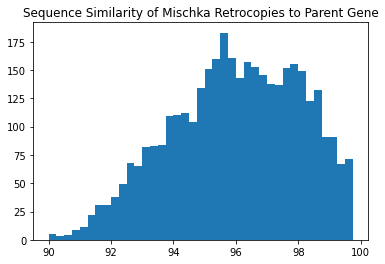

In [11]:
plt.hist(list(mismatch_retrocopies.values()), bins = np.arange(90,100,0.25))
plt.title("Sequence Similarity of Mischka Retrocopies to Parent Gene")

In [12]:
# compare against fox and dhole
shared_rcs = {}
fox_rcs = {}
dhole_rcs = {}
either_rcs = {}
f = open("/nfs/turbo/jmkiddscr/anthony-projects/final_mischka_paper_files/supplementary_table_10.txt", 'rt')
next(f)
for line in f:
    line = line.rstrip().split()
    msk_rc = "{}_{}_{}".format(line[0], line[1], line[2])
    try:
        mmr = mismatch_no_gene[msk_rc]
    except:
        continue
    fox_presence = line[3]
    dhole_presence = line[6]
    either_rcs[msk_rc] = mmr
    if fox_presence != "N/A" and dhole_presence != "N/A":
        shared_rcs[msk_rc] = mmr # both fox and dhole
    elif fox_presence == "N/A" and dhole_presence != "N/A":
        dhole_rcs[msk_rc] = mmr
    elif fox_presence != "N/A" and dhole_presence == "N/A":
        fox_rcs[msk_rc] = mmr
f.close()

In [13]:
len(shared_rcs), len(fox_rcs), len(dhole_rcs)

(455, 543, 883)

In [14]:
unique_to_msk = {}
for rc, mmr in mismatch_no_gene.items():
    if rc not in shared_rcs.keys() and rc not in fox_rcs.keys() and rc not in dhole_rcs.keys():
        unique_to_msk[rc] = mmr
unique_to_msk

{'chr1_325443_330783': 96.56,
 'chr1_408403_409542': 97.77,
 'chr1_5321743_5324308': 99.73,
 'chr1_12966881_12967310': 99.07,
 'chr1_13071355_13071537': 98.36,
 'chr1_14743647_14744381': 96.87,
 'chr1_14868551_14869191': 97.44,
 'chr1_21241008_21241633': 99.84,
 'chr1_21578036_21578804': 99.35,
 'chr1_22415593_22416645': 95.91,
 'chr1_25306063_25307651': 97.82,
 'chr1_25423521_25424378': 98.72,
 'chr1_25530600_25532151': 98.63,
 'chr1_25792450_25793104': 99.08,
 'chr1_26254327_26255892': 97.44,
 'chr1_26647195_26647738': 94.75,
 'chr1_33048137_33049605': 95.54,
 'chr1_33824216_33825974': 97.3,
 'chr1_34818680_34819093': 97.34,
 'chr1_35462161_35462576': 93.25,
 'chr1_35594055_35595105': 98.1,
 'chr1_35944845_35945617': 95.55,
 'chr1_38110024_38110691': 98.05,
 'chr1_39204368_39204553': 98.39,
 'chr1_39885929_39886834': 100.0,
 'chr1_40869156_40869528': 95.71,
 'chr1_40904728_40904900': 94.22,
 'chr1_40973408_40973580': 94.22,
 'chr1_41045207_41045379': 94.22,
 'chr1_42101354_42102706':

In [15]:
np.mean(list(unique_to_msk.values())), np.median(list(unique_to_msk.values()))

(96.5755926115957, 96.75)

In [16]:
np.mean(list(either_rcs.values())), np.median(list(either_rcs.values()))

(95.62690058479532, 95.72)

{'whiskers': [<matplotlib.lines.Line2D at 0x14d3e7ecbe80>,
 'caps': [<matplotlib.lines.Line2D at 0x14d3e7edb520>,
 'boxes': [<matplotlib.lines.Line2D at 0x14d3e7f3d7c0>,
 'medians': [<matplotlib.lines.Line2D at 0x14d3e7edbc40>,
 'fliers': [<matplotlib.lines.Line2D at 0x14d3e7edbfd0>,
 'means': []}

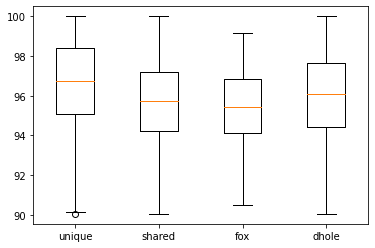

In [17]:
box_values = [list(unique_to_msk.values()), list(either_rcs.values()), list(fox_rcs.values()), list(dhole_rcs.values())]
plt.boxplot(box_values, labels=['unique', 'shared', 'fox', 'dhole'])

In [18]:
tstat, pvalue = ttest_ind(list(unique_to_msk.values()), list(either_rcs.values()))
tstat, pvalue

(14.0819719128449, 6.019934456184583e-44)

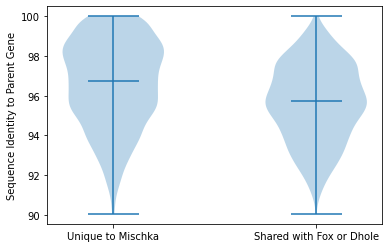

In [19]:
box_values = [list(unique_to_msk.values()), list(either_rcs.values())]
_= plt.violinplot(box_values,showmedians=True)
#plt.text(1.3, 99, "P-value: 6.02e-44")
plt.xticks(np.arange(1,3), labels=['Unique to Mischka', 'Shared with Fox or Dhole'])
plt.ylabel("Sequence Identity to Parent Gene")
#plt.title("Mischka Retrocopy Sequence Similarity vs. Fox and Dhole")
plt.savefig("/nfs/turbo/jmkiddscr/anthony-projects/final_mischka_paper_files/msk_seq_div_from_foxdhole.jpg", dpi=300, bbox_inches='tight')

Text(0.5, 1.0, 'Sequence Similarity of Mischka RCs in Fox and Dhole to Parent Gene')

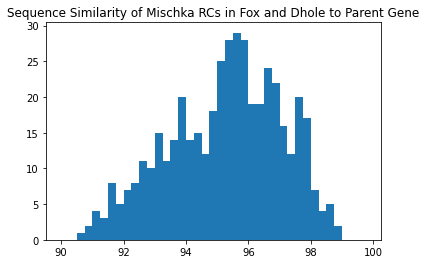

In [20]:
plt.hist(list(shared_rcs.values()), bins = np.arange(90,100,0.25))
plt.title("Sequence Similarity of Mischka RCs in Fox and Dhole to Parent Gene")

Text(0.5, 1.0, 'Sequence Similarity of Mischka RCs in Fox to Parent Gene')

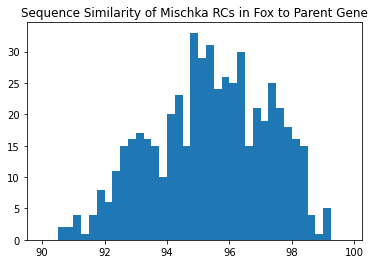

In [21]:
plt.hist(list(fox_rcs.values()), bins = np.arange(90,100,0.25))
plt.title("Sequence Similarity of Mischka RCs in Fox to Parent Gene")

Text(0.5, 1.0, 'Sequence Similarity of Mischka RCs in Dhole to Parent Gene')

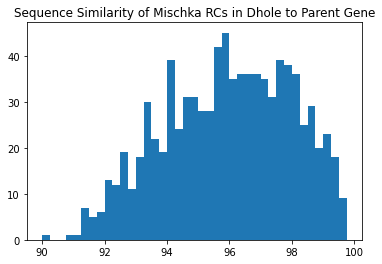

In [22]:
plt.hist(list(dhole_rcs.values()), bins = np.arange(90,100,0.25))
plt.title("Sequence Similarity of Mischka RCs in Dhole to Parent Gene")

In [23]:
# shared with mcanlor
shared_w_mcl = {}
msk_specific = {}
f = open("mischka_rcs_no_mcl.txt", 'rt')
for line in f:
    line = line.rstrip().split()
    key = "{}_{}_{}".format(line[0], line[1], line[2])
    try:
        mmr = mismatch_no_gene[key]
    except:
        continue
    msk_specific[key] = mmr
f.close()
f = open("mischka_rcs_shared_mcl.txt", 'rt')
for line in f:
    line = line.rstrip().split()
    key = "{}_{}_{}".format(line[0], line[1], line[2])
    try:
        mmr = mismatch_no_gene[key]
    except:
        continue
    shared_w_mcl[key] = mmr
f.close()

In [24]:
len(shared_w_mcl), len(msk_specific)

(2845, 45)

In [25]:
np.mean(list(msk_specific.values())), np.median(list(msk_specific.values()))

(99.53844444444445, 99.92)

In [26]:
np.mean(list(shared_w_mcl.values())), np.median(list(shared_w_mcl.values()))

(96.04025659050967, 96.14)

{'whiskers': [<matplotlib.lines.Line2D at 0x14d3e7b9d7f0>,
 'caps': [<matplotlib.lines.Line2D at 0x14d3e7b9df10>,
 'boxes': [<matplotlib.lines.Line2D at 0x14d3e7b9d460>,
 'medians': [<matplotlib.lines.Line2D at 0x14d3e7ba6670>,
 'fliers': [<matplotlib.lines.Line2D at 0x14d3e7ba6a00>,
 'means': []}

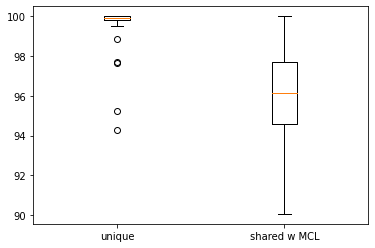

In [27]:
box_values = [list(msk_specific.values()), list(shared_w_mcl.values())]
plt.boxplot(box_values, labels=['unique', 'shared w MCL'])

In [28]:
tstat, pvalue = ttest_ind(list(msk_specific.values()), list(shared_w_mcl.values()))
tstat, pvalue

(11.247080165476318, 9.395796527264486e-29)

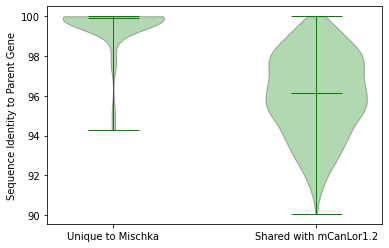

In [29]:
box_values = [list(msk_specific.values()), list(shared_w_mcl.values())]
violin_parts= plt.violinplot(box_values,showmedians=True)
for pc in violin_parts['bodies']:
    pc.set_facecolor('green')
    pc.set_edgecolor('black')
for partname in ('cbars', 'cmins', 'cmaxes', 'cmedians'):
    vp = violin_parts[partname]
    vp.set_edgecolor("green")
    vp.set_linewidth(1)
#plt.text(1.3, 99, "P-value: 9.396e-29")
plt.xticks(np.arange(1,3), labels=['Unique to Mischka', 'Shared with mCanLor1.2'])
plt.ylabel("Sequence Identity to Parent Gene")
#plt.title("Mischka Retrocopy Sequence Similarity vs. mCanLor1.2")
plt.savefig("/nfs/turbo/jmkiddscr/anthony-projects/final_mischka_paper_files/msk_seq_div_from_mcl.jpg", dpi=300, bbox_inches='tight')

In [30]:
# fullORF
fullORF = {}
f = open("mischka.fullORF_retrocopies.sorted.txt", 'rt')
for line in f:
    line = line.rstrip().split()
    key = "{}_{}_{}".format(line[0], line[1], line[2])
    try:
        mmr = mismatch_no_gene[key]
    except:
        continue
    fullORF[key] = mmr
f.close()
fullORF

{'chr1_39885929_39886834': 100.0,
 'chr10_45624521_45626831': 99.96,
 'chr11_12175194_12175911': 99.86,
 'chr11_42427400_42429635': 100.0,
 'chr11_61894770_61896533': 99.94,
 'chr12_11811454_11812310': 99.88,
 'chr12_33514731_33515690': 99.06,
 'chr12_39236779_39237126': 100.0,
 'chr12_59331455_59332748': 99.38,
 'chr13_7975753_7977501': 99.94,
 'chr13_49216890_49218432': 99.94,
 'chr15_7550735_7552827': 99.9,
 'chr15_8944034_8945119': 100.0,
 'chr15_46788486_46789360': 99.89,
 'chr16_2316334_2321340': 99.98,
 'chr16_13985503_13985850': 100.0,
 'chr18_13507467_13508372': 99.78,
 'chr19_36773904_36774333': 99.77,
 'chr20_528373_529701': 99.82,
 'chr20_5410644_5411154': 100.0,
 'chr20_15470837_15472906': 99.9,
 'chr20_49967489_49968518': 99.81,
 'chr21_43534228_43537015': 99.82,
 'chr22_49864307_49865024': 99.58,
 'chr23_16592855_16593753': 99.89,
 'chr24_16359571_16360079': 99.8,
 'chr24_24640181_24640730': 100.0,
 'chr24_32101391_32102484': 100.0,
 'chr25_2363246_2365443': 100.0,
 'chr

In [31]:
not_full = {}
for key, mmr in mismatch_no_gene.items():
    if key not in fullORF.keys():
        not_full[key] = mmr

In [32]:
tstat, pvalue = ttest_ind(list(fullORF.values()), list(not_full.values()))
tstat, pvalue

(14.78478850455036, 3.817099754347877e-48)

In [36]:
np.mean(list(fullORF.values())), np.median(list(fullORF.values()))

(99.86060606060606, 99.92500000000001)

In [37]:
np.mean(list(not_full.values())), np.median(list(not_full.values()))

(96.0438974495218, 96.14)

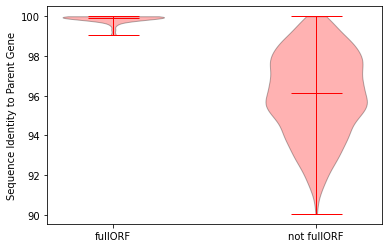

In [33]:
box_values = [list(fullORF.values()), list(not_full.values())]
violin_parts= plt.violinplot(box_values,showmedians=True)
for pc in violin_parts['bodies']:
    pc.set_facecolor('red')
    pc.set_edgecolor('black')
for partname in ('cbars', 'cmins', 'cmaxes', 'cmedians'):
    vp = violin_parts[partname]
    vp.set_edgecolor("red")
    vp.set_linewidth(1)
#plt.text(1.3, 99, "P-value: 3.817e-48")
plt.xticks(np.arange(1,3), labels=['fullORF', 'not fullORF'])
plt.ylabel("Sequence Identity to Parent Gene")
#plt.title("Mischka Retrocopy Sequence Similarity vs. mCanLor1.2")
plt.savefig("/nfs/turbo/jmkiddscr/anthony-projects/final_mischka_paper_files/msk_seq_div_ORF.jpg", dpi=300, bbox_inches='tight')